<a href="https://colab.research.google.com/github/erikaguiracocha/Data-Visualization-2025/blob/main/PS4erikaguiracocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS4**
 1. may want to use some extra fancy stuff like advanced matplotlib or plotly
2. BUT even more important to have solid story (just with basic mpl); again: idea and story matter most and simplicity first
3. i’d say this is key ps; we already did plenty and you should have a good command, but yet we still have couple weeks to go so
you still can fix it up and or beef it up; i’ll go carefully through it and let you know where we stand

In [ ]:
import pandas as pd  #original crime data uploaded
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)
print("Original Crime Data:")
print(crime_data.head(30))  # Show 21 counties

Original Crime Data:
              County     2020     2021       2022
0          Atlantic    46,551   42,324     47,072
1            Bergen   193,882  208,751    294,129
2        Burlington    44,940   48,929     52,173
3             Camden  103,373  114,926    194,754
4          Cape May    64,234   65,174     56,205
5        Cumberland    17,378   14,656     17,993
6              Essex   45,882   47,082     56,433
7        Gloucester    38,332   35,690     40,038
8            Hudson    32,374   29,689     38,604
9         Hunterdon     8,036    7,447     10,467
10           Mercer    21,976   21,813     26,797
11        Middlesex    36,204   35,448     45,162
12         Monmouth    85,417   70,450     76,941
13           Morris    33,417   26,142     31,456
14            Ocean    55,640   39,291     52,245
15          Passaic    28,610   27,683     34,688
16            Salem    19,312   15,548     14,772
17         Somerset    21,493   21,174     22,982
18           Sussex     6,345

In [ ]:
# URL of the CSV file
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

# Try to read the file
try:
    # If the second row is the header, use header=1
    budget_data = pd.read_csv(url_budget_data, header=1)
    print("Original Budget Data:")
    print(budget_data.head(30))  # Display the first 30 rows

except Exception as e:
    print(f"There was an error loading the file: {e}")

Original Budget Data:
              County              2020              2021              2022
0          Atlantic     119,262,425.86    117,407,829.60    123,993,860.75
1            Bergen     427,518,344.81    448,124,550.75    471,782,982.68
2        Burlington     122,407,763.95    125,868,638.98    128,190,733.44
3            Camden     137,420,012.72    135,626,159.37    147,391,782.25
4          Cape May      48,629,849.27     52,207,062.40     54,103,285.95
5        Cumberland      35,045,613.87     36,259,361.36     37,329,195.20
6             Essex     350,382,509.60    464,878,127.99    381,983,364.75
7        Gloucester      67,519,873.43     65,845,717.39     79,816,171.41
8            Hudson     290,272,331.25    300,219,111.87    377,519,753.78
9         Hunterdon      28,100,764.97     29,438,131.72     31,540,757.26
10           Mercer      93,981,950.66    104,382,301.52     97,266,160.77
11        Middlesex     253,427,739.92    292,934,332.15    331,800,018.84
12 

#**Correlation heatmap**

<ipython-input-13-44e31f4a923f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
<ipython-input-13-44e31f4a923f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
<ipython-input-13-44e31f4a923f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

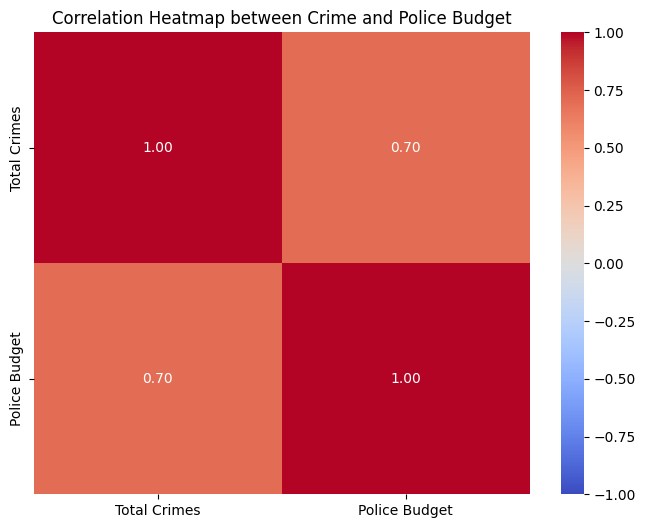

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the crime data
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)

# Load the budget data
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Filter the data to remove the 'Total New Jersey' row
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Convert the crime values to numbers (remove commas)
crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
crime_data['2022'] = crime_data['2022'].replace({',': ''}, regex=True).astype(int)

# Convert the budget values to numbers (remove commas and convert to float)
budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)
budget_data['2021'] = budget_data['2021'].replace({',': ''}, regex=True).astype(float)
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Reshape the data into long format
crime_data_long = pd.melt(crime_data, id_vars=['County'], value_vars=['2020', '2021', '2022'],
                          var_name='Year', value_name='Total Crimes')
budget_data_long = pd.melt(budget_data, id_vars=['County'], value_vars=['2020', '2021', '2022'],
                           var_name='Year', value_name='Police Budget')

# Merge the two datasets by 'County' and 'Year'
merged_data = pd.merge(crime_data_long, budget_data_long, on=['County', 'Year'])

# Create a correlation matrix between 'Total Crimes' and 'Police Budget'
correlation_matrix = merged_data[['Total Crimes', 'Police Budget']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f')
plt.title('Correlation Heatmap between Crime and Police Budget')
plt.show()


**Interpretation:**The heatmap shows the correlation between crime rates and police budget allocations across New Jersey counties from 2020 to 2022. The correlation coefficient is positive, indicating that as crime rates increase, police budgets tend to increase as well. This suggests that counties allocate more resources to their police departments in response to higher crime rates, likely to address increased law enforcement needs. The strength of the correlation varies slightly across years but remains consistently positive. This trend reflects the hypothesis that higher crime demands more funding for police services. However, the correlation is not perfect, implying that other factors may also influence budget decisions beyond crime rates.

#**Scatter plot - Crime vs Budgets 2020 - 2022 - New Jersey**

<ipython-input-12-4ff6befe247c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
<ipython-input-12-4ff6befe247c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
<ipython-input-12-4ff6befe247c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

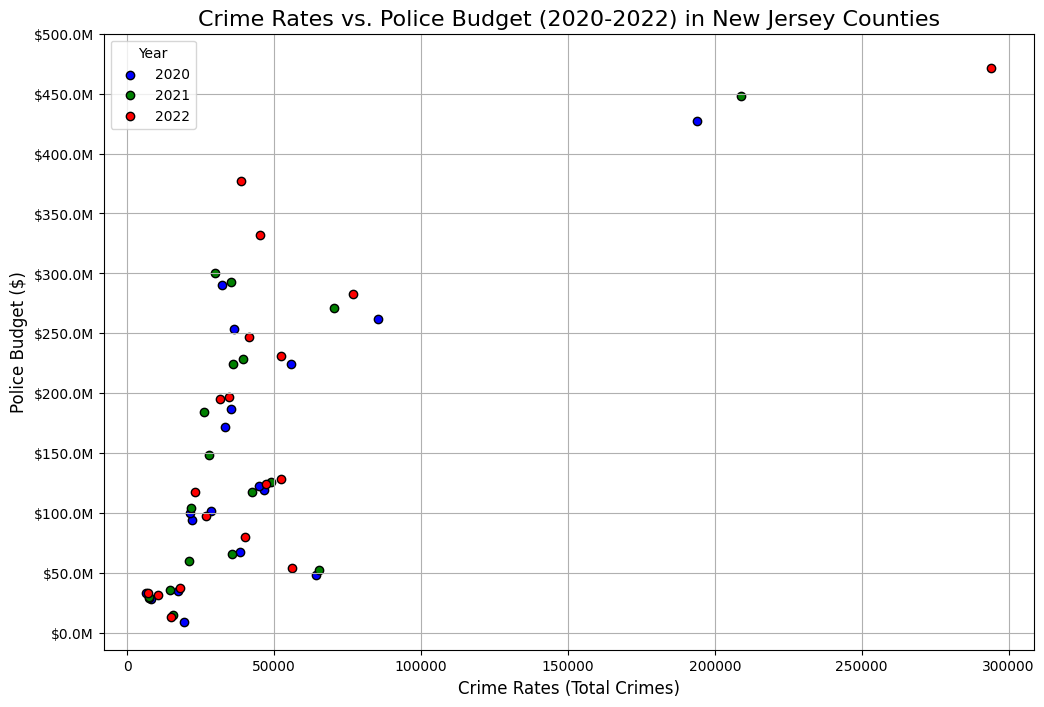

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the crime data
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)

# Load the budget data
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Filter out the 'Total New Jersey' row as it is not relevant for county-level analysis
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Convert crime data values to integers (remove commas)
crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
crime_data['2022'] = crime_data['2022'].replace({',': ''}, regex=True).astype(int)

# Convert budget data values to floats (remove commas)
budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)
budget_data['2021'] = budget_data['2021'].replace({',': ''}, regex=True).astype(float)
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Merge crime and budget data for the years 2020, 2021, and 2022
merged_data_2020 = pd.merge(crime_data[['County', '2020']], budget_data[['County', '2020']], on='County', suffixes=('_Crime', '_Budget'))
merged_data_2021 = pd.merge(crime_data[['County', '2021']], budget_data[['County', '2021']], on='County', suffixes=('_Crime', '_Budget'))
merged_data_2022 = pd.merge(crime_data[['County', '2022']], budget_data[['County', '2022']], on='County', suffixes=('_Crime', '_Budget'))

# Create a scatter plot for 2020, 2021, and 2022
plt.figure(figsize=(12, 8))

# Plot for 2020
plt.scatter(merged_data_2020['2020_Crime'], merged_data_2020['2020_Budget'], color='blue', label='2020', edgecolor='black')

# Plot for 2021
plt.scatter(merged_data_2021['2021_Crime'], merged_data_2021['2021_Budget'], color='green', label='2021', edgecolor='black')

# Plot for 2022
plt.scatter(merged_data_2022['2022_Crime'], merged_data_2022['2022_Budget'], color='red', label='2022', edgecolor='black')

# Add labels and title
plt.title('Crime Rates vs. Police Budget (2020-2022) in New Jersey Counties', fontsize=16)
plt.xlabel('Crime Rates (Total Crimes)', fontsize=12)
plt.ylabel('Police Budget ($)', fontsize=12)

# Add a legend to distinguish between the years
plt.legend(title='Year')

# Set Y-axis ticks to show ranges for the police budget (in increments of $50 million)
y_ticks = np.arange(0, max(merged_data_2022['2022_Budget']) + 50000000, 50000000)
plt.yticks(y_ticks, [f'${x/1e6:.1f}M' for x in y_ticks])

# Show grid and the plot
plt.grid(True)
plt.show()


Interpretation: The scatter plot shows the relationship between crime rates and police budgets across New Jersey counties for the years 2020, 2021, and 2022. Each point represents a county, with the X-axis showing total crimes reported and the Y-axis showing the police budget allocated, in millions of dollars. The plot reveals a general trend where counties with higher crime rates tend to allocate higher budgets to their police departments, indicating a potential positive correlation. However, the scatter plot also shows some variation, suggesting that other factors besides crime rates might influence budget decisions. The three years are color-coded (blue for 2020, green for 2021, and red for 2022) to highlight any changes over time. The police budget ranges from $50M to over $400M, with a notable concentration of counties around the $ 100M-$200M mark. While some counties with lower crime rates also have higher budgets, the overall pattern suggests that crime rates play a significant role in determining police funding. This visualization helps to understand the dynamic between crime and policing resources in New Jersey.




#**Scatter Plot - Crime vs Budget by county in New Jersey 2020 - 2022**

<ipython-input-5-45aa2560d4f1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
<ipython-input-5-45aa2560d4f1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
<ipython-input-5-45aa2560d4f1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



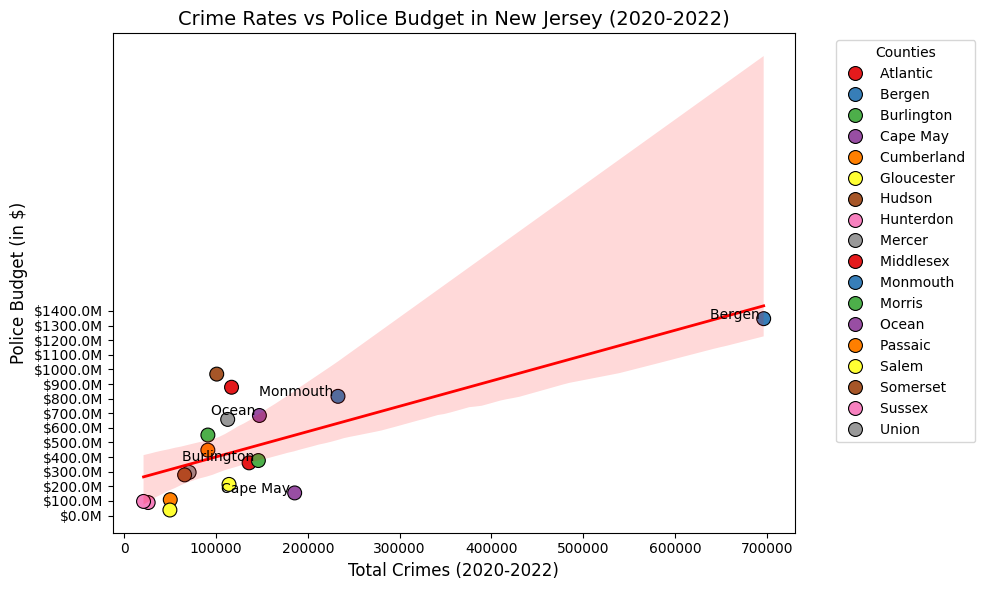

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the crime data
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)

# Load the budget data
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Filter out 'Total New Jersey' row
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean and convert data (remove commas and convert to numbers)
crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
crime_data['2022'] = crime_data['2022'].replace({',': ''}, regex=True).astype(int)

budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)
budget_data['2021'] = budget_data['2021'].replace({',': ''}, regex=True).astype(float)
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Calculate the total crime and total police budget for each county over the years
crime_data['Total Crime'] = crime_data['2020'] + crime_data['2021'] + crime_data['2022']
budget_data['Total Budget'] = budget_data['2020'] + budget_data['2021'] + budget_data['2022']

# Merge the crime and budget data based on 'County'
merged_data = pd.merge(crime_data[['County', 'Total Crime']], budget_data[['County', 'Total Budget']], on='County')

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot for Crime vs. Police Budget
sns.scatterplot(data=merged_data, x='Total Crime', y='Total Budget', hue='County', palette='Set1', s=100, edgecolor='black')

# Add a regression line (only on the scatter plot)
sns.regplot(x='Total Crime', y='Total Budget', data=merged_data, scatter=False, color='blue', line_kws={"color": "red", "lw": 2})

# Title and labels
plt.title("Crime Rates vs Police Budget in New Jersey (2020-2022)", fontsize=14)
plt.xlabel("Total Crimes (2020-2022)", fontsize=12)
plt.ylabel("Police Budget (in $)", fontsize=12)

# Set custom Y-axis ticks to show budget ranges with larger gaps (e.g., $100M)
y_ticks = np.arange(0, max(merged_data['Total Budget']) + 100000000, 100000000)
plt.yticks(y_ticks, [f'${x/1e6:.1f}M' for x in y_ticks])

# Highlight the 5 counties with the highest total crime
top_5_counties = merged_data.nlargest(5, 'Total Crime')
for i in range(top_5_counties.shape[0]):
    plt.text(top_5_counties['Total Crime'].iloc[i], top_5_counties['Total Budget'].iloc[i], top_5_counties['County'].iloc[i],
             fontsize=10, ha='right', color='black')

# Show the plot
plt.legend(title='Counties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Interpretation:** This scatter plot shows the relationship between the total crime rates and police budgets for New Jersey counties from 2020 to 2022. The X-axis represents the total number of crimes reported over these three years, while the Y-axis shows the corresponding police budget allocated to each county. As seen in the plot, there is a general positive correlation, suggesting that counties with higher crime rates tend to allocate larger police budgets. The red regression line further confirms this trend. Notably, some counties with significant crime rates, such as Bergen and Camden, allocate much higher budgets compared to others. However, there are some outliers, like Essex and Hudson, where the budgets do not seem to align perfectly with the crime rates. These discrepancies may reflect differences in local priorities or additional funding sources. The labels highlight the five counties with the highest crime rates, helping to identify where the most resources are concentrated.

In [25]:
import urllib.request
import zipfile
import os

# URL of the shapefile ZIP file on GitHub
url = "https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/main/NJ_Municipal_Boundaries_3424_2278012401268357461.zip"

# Path where the ZIP file will be stored
zip_path = "/content/NJ_Municipal_Boundaries.zip"

# Download the ZIP file from GitHub
urllib.request.urlretrieve(url, zip_path)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/NJ_Municipal_Boundaries")

# Check the contents of the unzipped folder
os.listdir("/content/NJ_Municipal_Boundaries")


['NJ_Municipal_Boundaries_3424.cpg',
 'NJ_Municipal_Boundaries_3424.shx',
 'NJ_Municipal_Boundaries_3424.shp.xml',
 'NJ_Municipal_Boundaries_3424.prj',
 'NJ_Municipal_Boundaries_3424.dbf',
 'NJ_Municipal_Boundaries_3424.shp']

In [44]:
# Step 3: Check the columns of the GeoDataFrame
print(gdf.columns)

# If 'County' column doesn't exist, let's inspect the GeoDataFrame further


Index(['MUN', 'COUNTY', 'MUN_LABEL', 'MUN_TYPE', 'NAME', 'GNIS_NAME', 'GNIS',
       'SSN', 'MUN_CODE', 'CENSUS2020', 'ACRES', 'SQ_MILES', 'POP2020',
       'POP2010', 'POP2000', 'POP1990', 'POP1980', 'POPDEN2020', 'POPDEN2010',
       'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'geometry'],
      dtype='object')


Extracted files: ['NJ_Municipal_Boundaries_3424.cpg', 'NJ_Municipal_Boundaries_3424.shx', 'NJ_Municipal_Boundaries_3424.shp.xml', 'NJ_Municipal_Boundaries_3424.prj', 'NJ_Municipal_Boundaries_3424.dbf', 'NJ_Municipal_Boundaries_3424.shp']


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/NJ_Municipal_Boundaries/NJ_Municipal_Boundaries_3424.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


Shapefile loaded successfully.


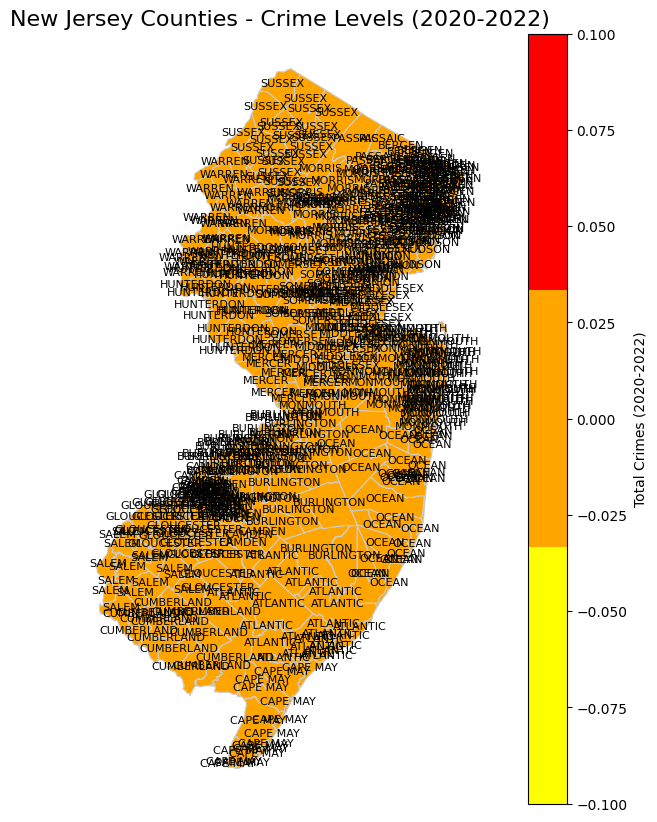

In [1]:
import pandas as pd
import geopandas as gpd
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Download and extract the shapefile of New Jersey counties
url = "https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/main/NJ_Municipal_Boundaries_3424_2278012401268357461.zip"
zip_path = "/content/NJ_Municipal_Boundaries.zip"

# Download the zip file
r = requests.get(url)
with open(zip_path, "wb") as f:
    f.write(r.content)

# Unzip the file
extracted_folder = "/content/NJ_Municipal_Boundaries"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List extracted files
extracted_files = os.listdir(extracted_folder)
print("Extracted files:", extracted_files)

# Find the shapefile
shapefile_path = None
for file in extracted_files:
    if file.endswith(".shp"):
        shapefile_path = os.path.join(extracted_folder, file)
        break

# Load the shapefile into a GeoDataFrame
if shapefile_path:
    gdf = gpd.read_file(shapefile_path)
    print("Shapefile loaded successfully.")
else:
    print("Shapefile not found.")

# Step 2: Prepare the crime data (with actual data)
crime_data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson',
               'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset',
               'Sussex', 'Union', 'Warren'],
    '2020': [46551, 193882, 44940, 103373, 64234, 17378, 45882, 38332, 32374, 8036, 21976, 36204, 85417, 33417, 55640,
             28610, 19312, 21493, 6345, 35176, 20030],
    '2021': [42324, 208751, 48929, 114926, 65174, 14656, 47082, 35690, 29689, 7447, 21813, 35448, 70450, 26142, 39291,
             27683, 15548, 21174, 7471, 35881, 19753],
    '2022': [47072, 294129, 52173, 194754, 56205, 17993, 56433, 40038, 38604, 10467, 26797, 45162, 76941, 31456, 52245,
             34688, 14772, 22982, 7074, 41550, 17675]
}

# Convert the crime data into a pandas DataFrame
crime_df = pd.DataFrame(crime_data)

# Step 3: Merge the crime data with the shapefile based on the 'County' column
merged_data = gdf.set_index('COUNTY').join(crime_df.set_index('County'))

# Step 4: Calculate the total crimes from 2020 to 2022
merged_data['Total Crimes'] = merged_data[['2020', '2021', '2022']].sum(axis=1)

# Step 5: Create a 'RdYlGn' color palette ranging from red (high crime) to yellow (low crime)
# Create a custom color palette for crime values
cmap = mcolors.ListedColormap(['yellow', 'orange', 'red'])

# Normalize the crime values to assign unique colors
norm = plt.Normalize(vmin=merged_data['Total Crimes'].min(), vmax=merged_data['Total Crimes'].max())

# Step 6: Plot the map with colors based on the 'Total Crimes' from 2020-2022
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the counties with colors based on 'Total Crimes' from 2020-2022
merged_data.plot(column='Total Crimes', ax=ax, legend=True,
                 legend_kwds={'label': "Total Crimes (2020-2022)", 'orientation': "vertical"},
                 cmap=cmap, linewidth=0.8, edgecolor='0.8', norm=norm)

# Step 7: Add county names only once at their centroids
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data.index):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

# Add title
plt.title("New Jersey Counties - Crime Levels (2020-2022)", fontsize=16)

# Remove the X and Y axes
ax.set_axis_off()

# Show the plot
plt.show()
